In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

data_folder = '../../data' 

path = os.path.join(data_folder, 'tv_season_to_race_gender_count.csv')

# normalize the result based on total ratio of each ethnic background from each other

[ 0  1  4  3  5  2  7 10 11  6  8  9 14 17 12 15]


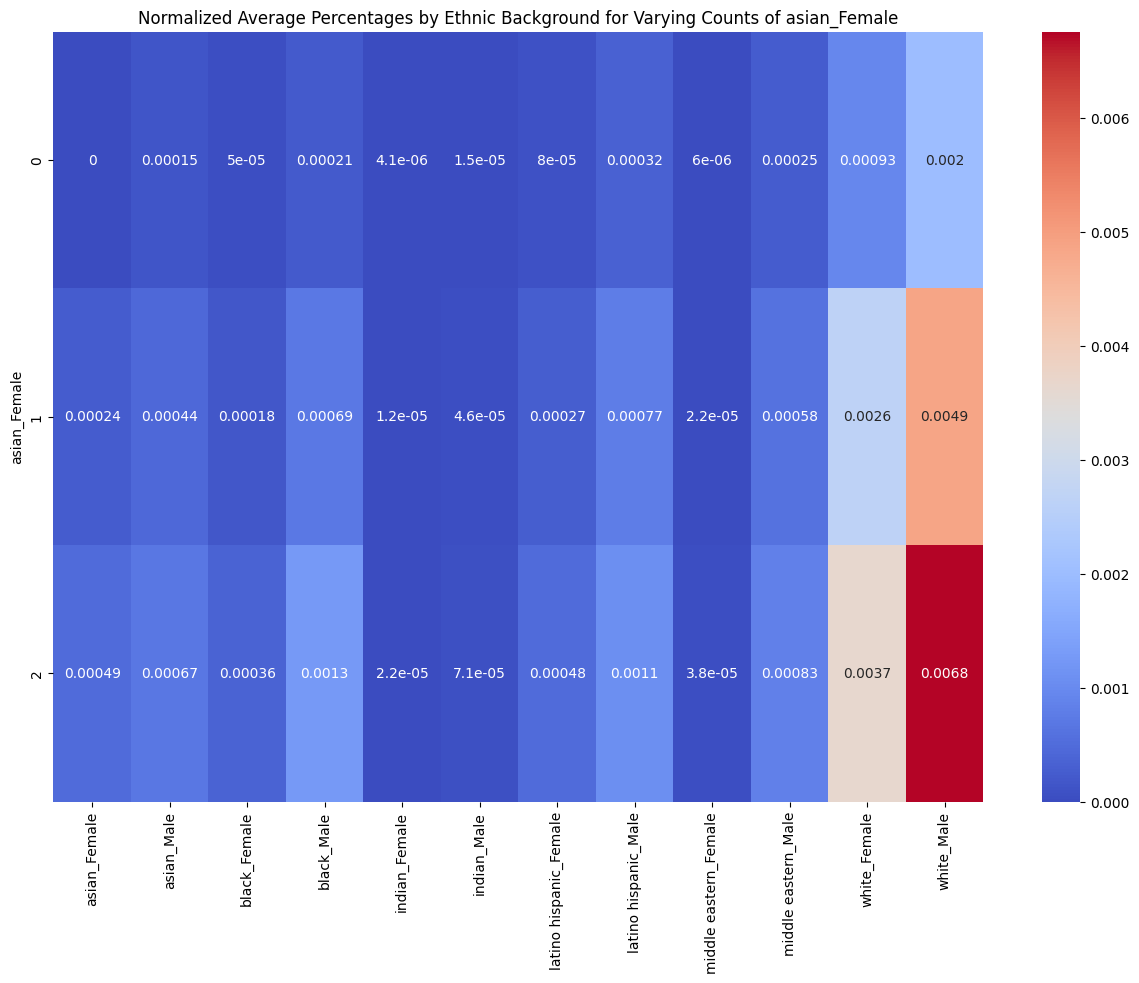

[ 3  0  1  2  4  6  5  7 11  8 10 12 13 15 14 19 18  9 16 17 21 20 27 28
 49]


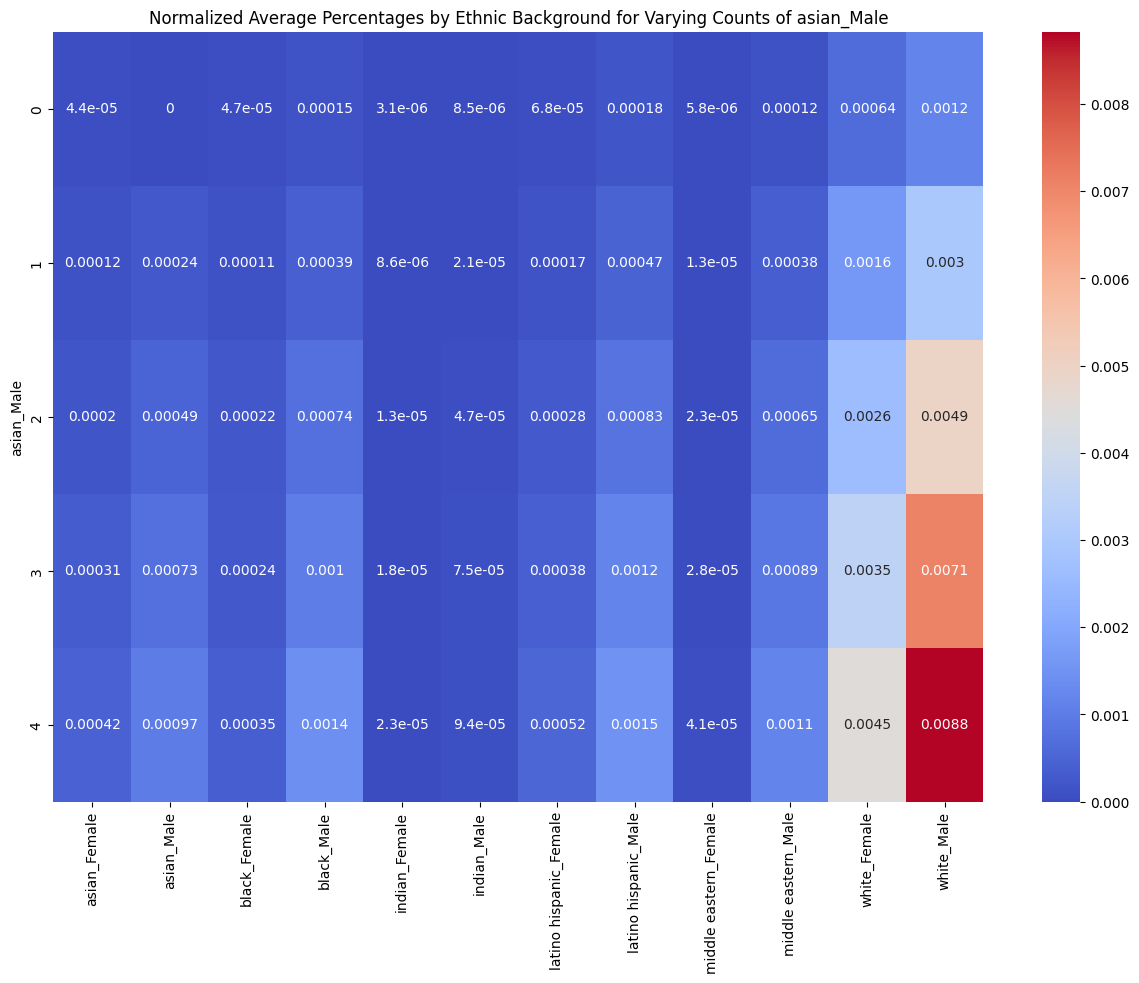

[ 0  1  2  4  8  5  6  3  7 10  9 13 11 22 15 14 17 12 16 19]


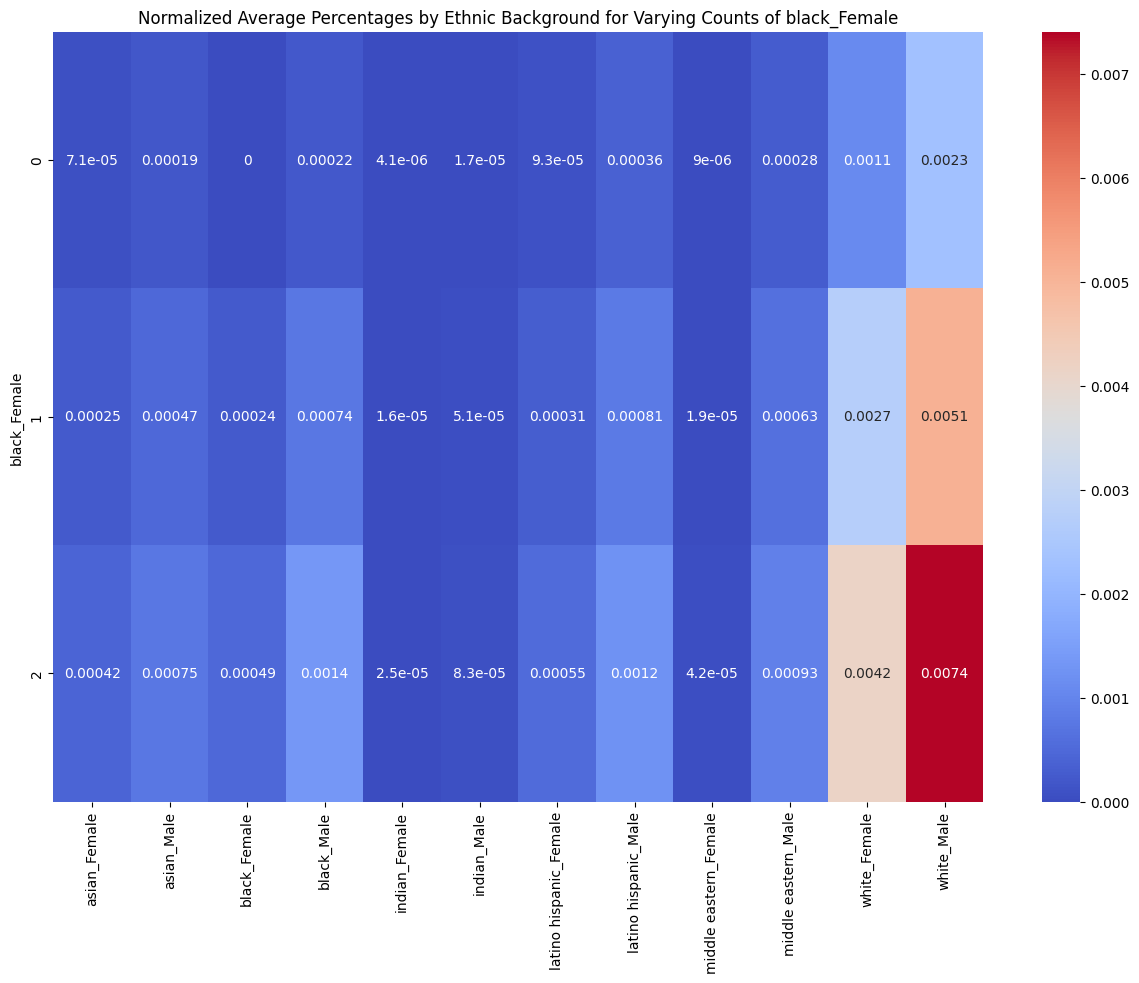

[ 2  0  3  5  1  4 12 10  8  6  7 11 22 25  9 13 16 17 18 23 31 20 14 19
 15 26 24 51 36 30 27 21 41 38 28 34 29 42 45 39 35 33 44]


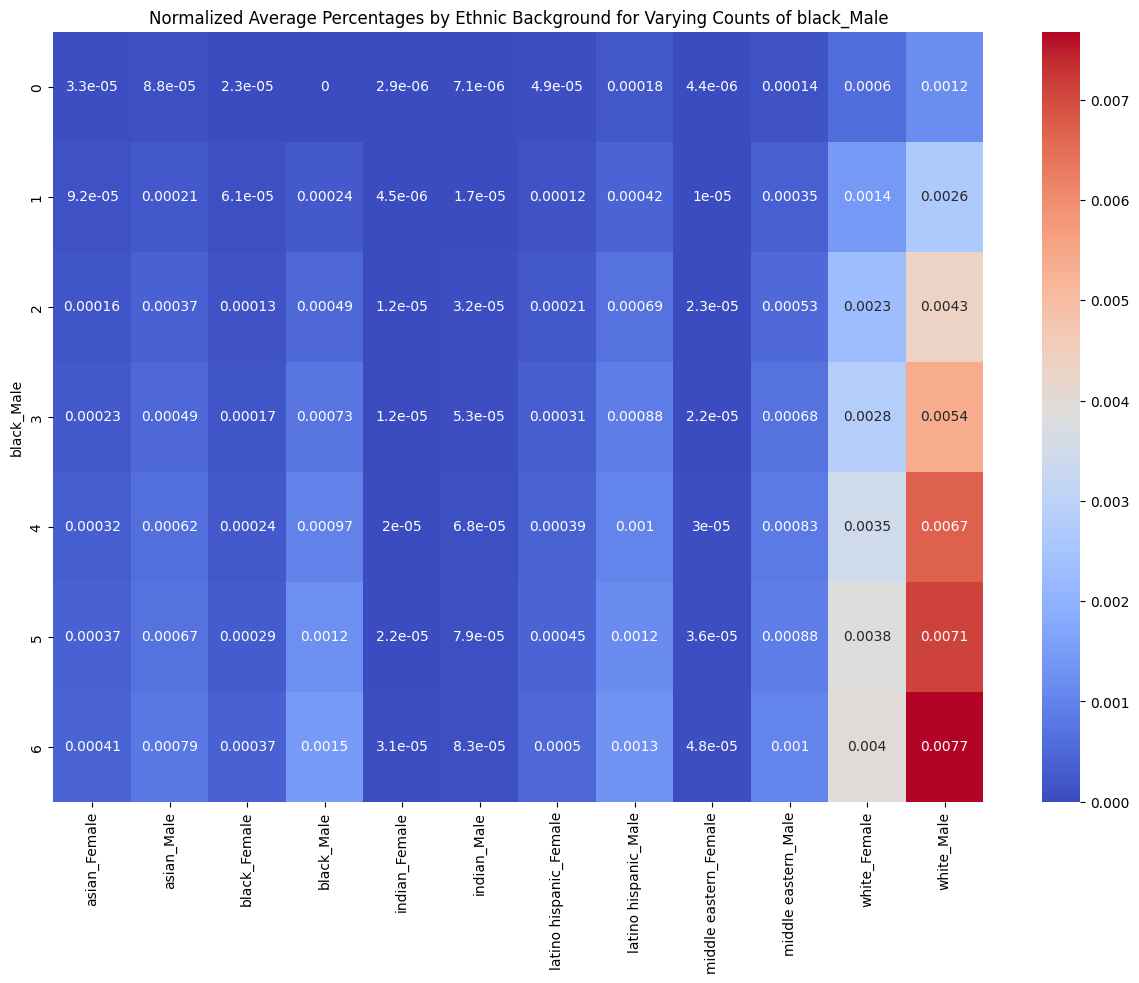

[0 1 2 3]


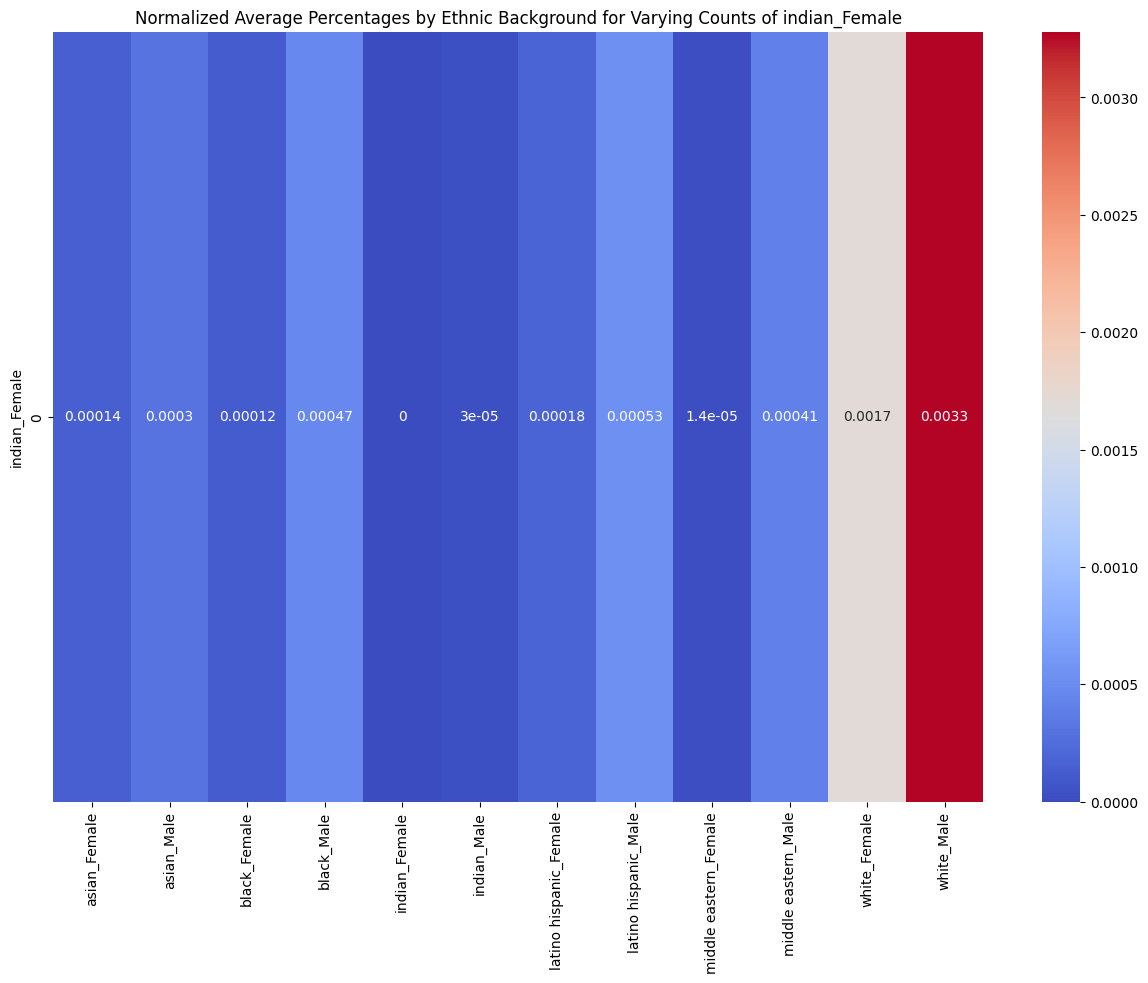

[0 1 2 3 4 5]


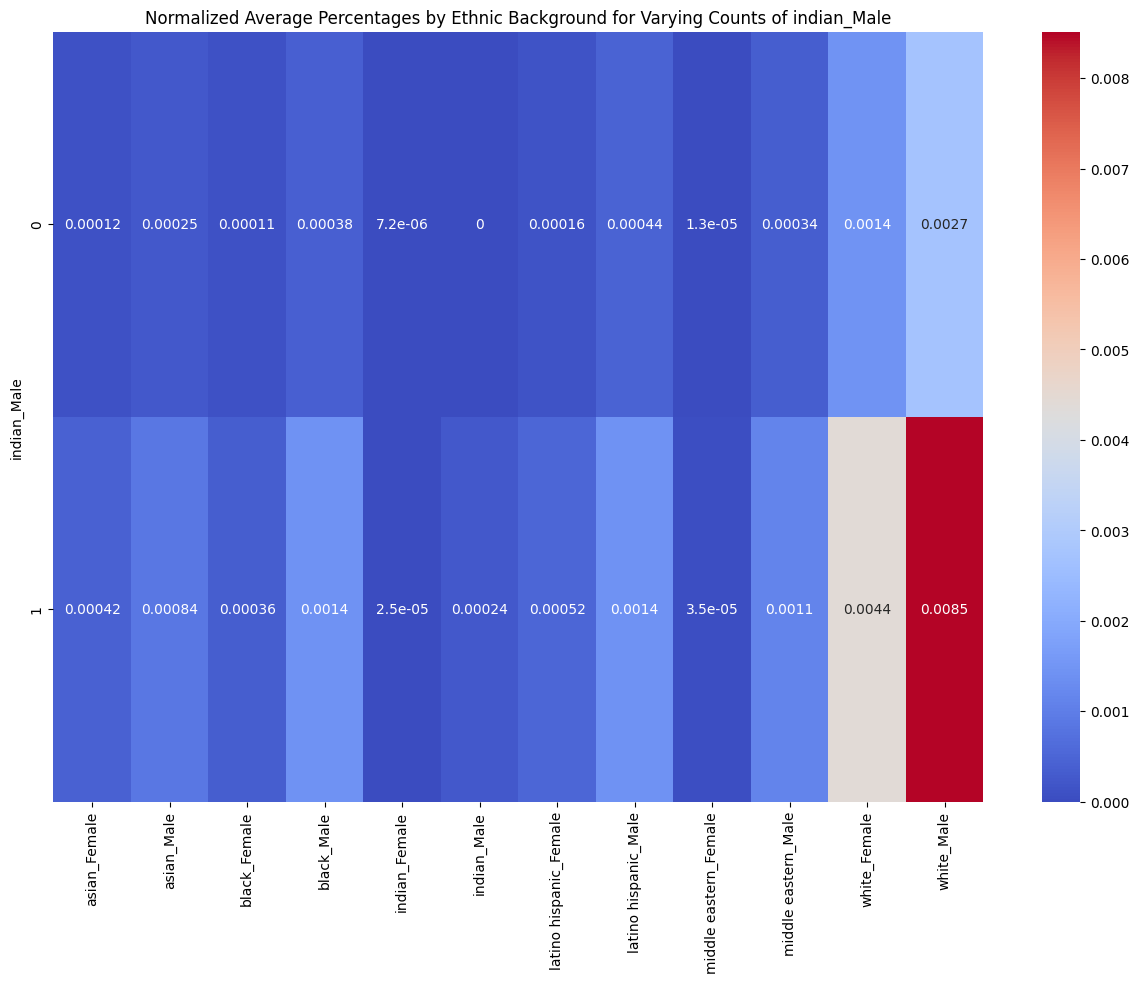

[ 0  1  3  4  2  5  7  9  6 11 12  8 13 10 18 21 15 14 16 17 30]


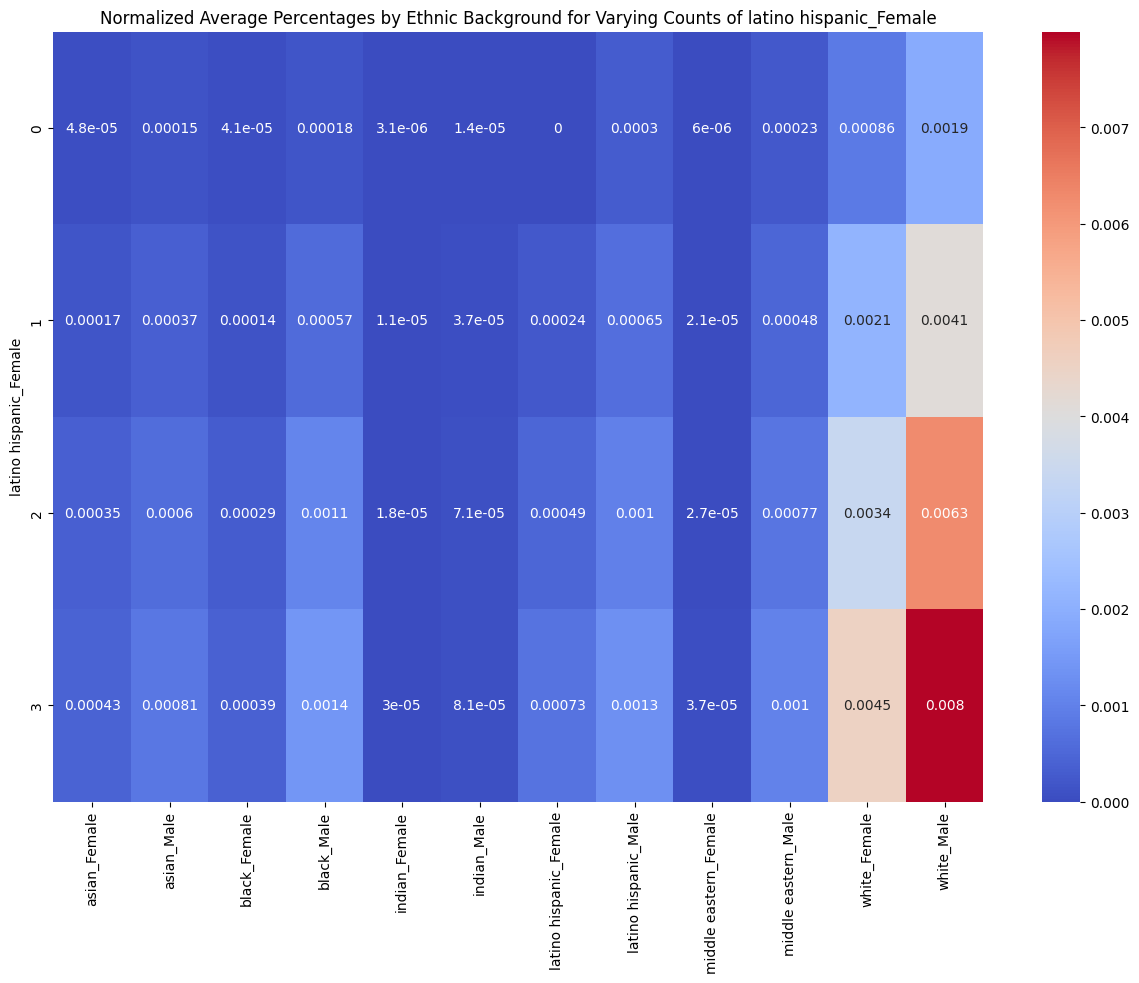

[ 1  2  0  4  6  3  8  5 11 10  7  9 19 12 18 13 26 14 15 24 33 25 34 36
 32 20 31 16 22 21 17 23 28 29 27 30]


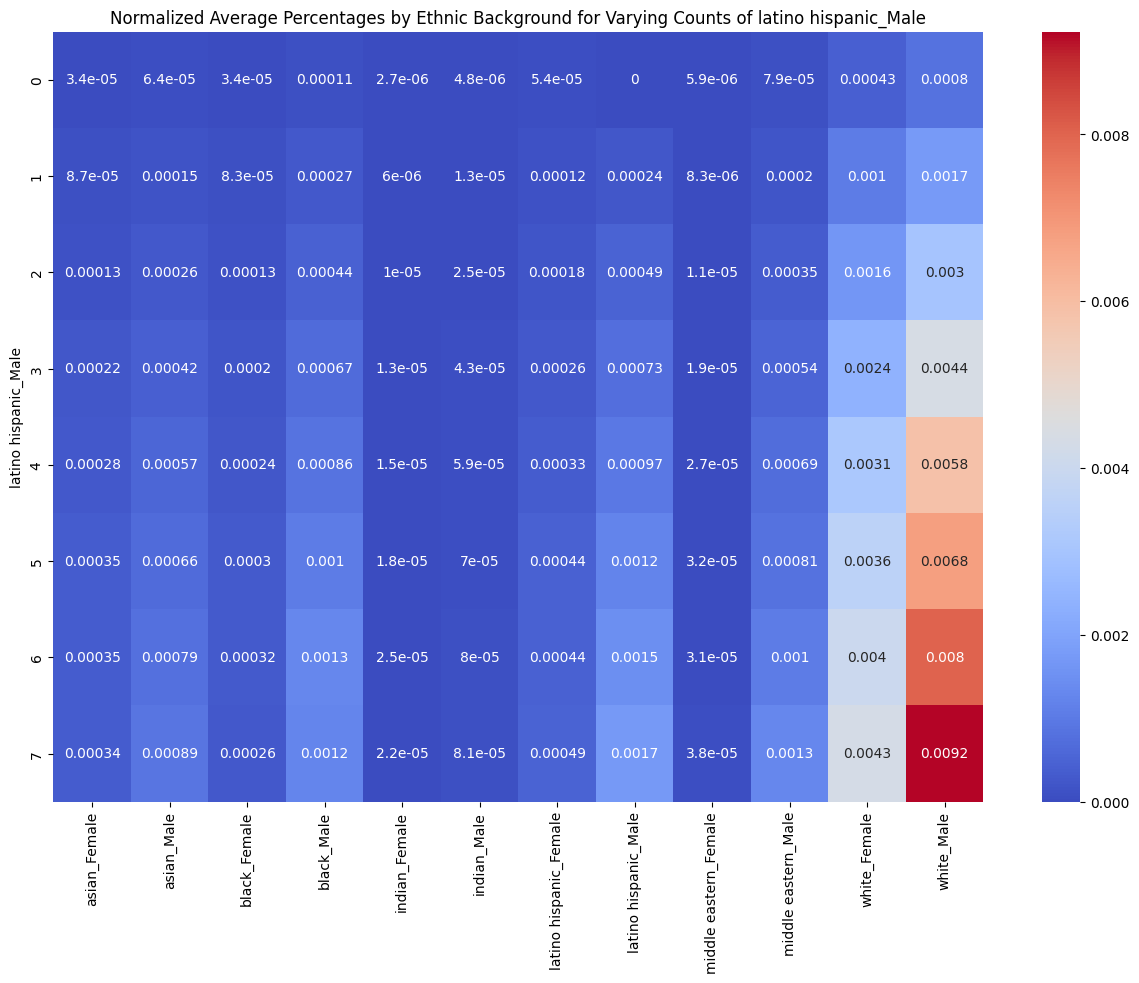

[0 2 1 3 4]


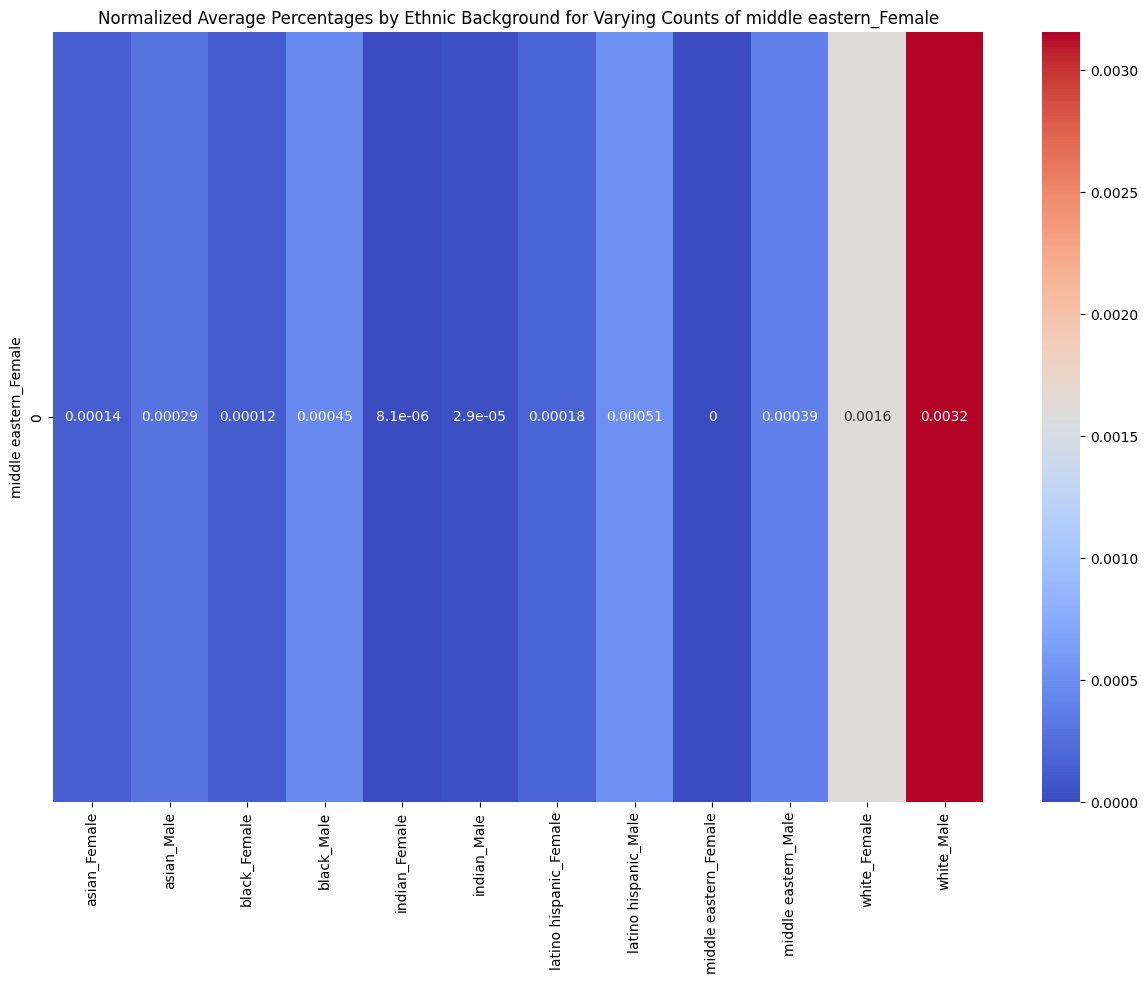

[ 0  3  1  5  4  8  2  6 20 10 12  9  7 18 19 11 21 17 16 25 24 34 23 28
 22 14 13 15 26 27]


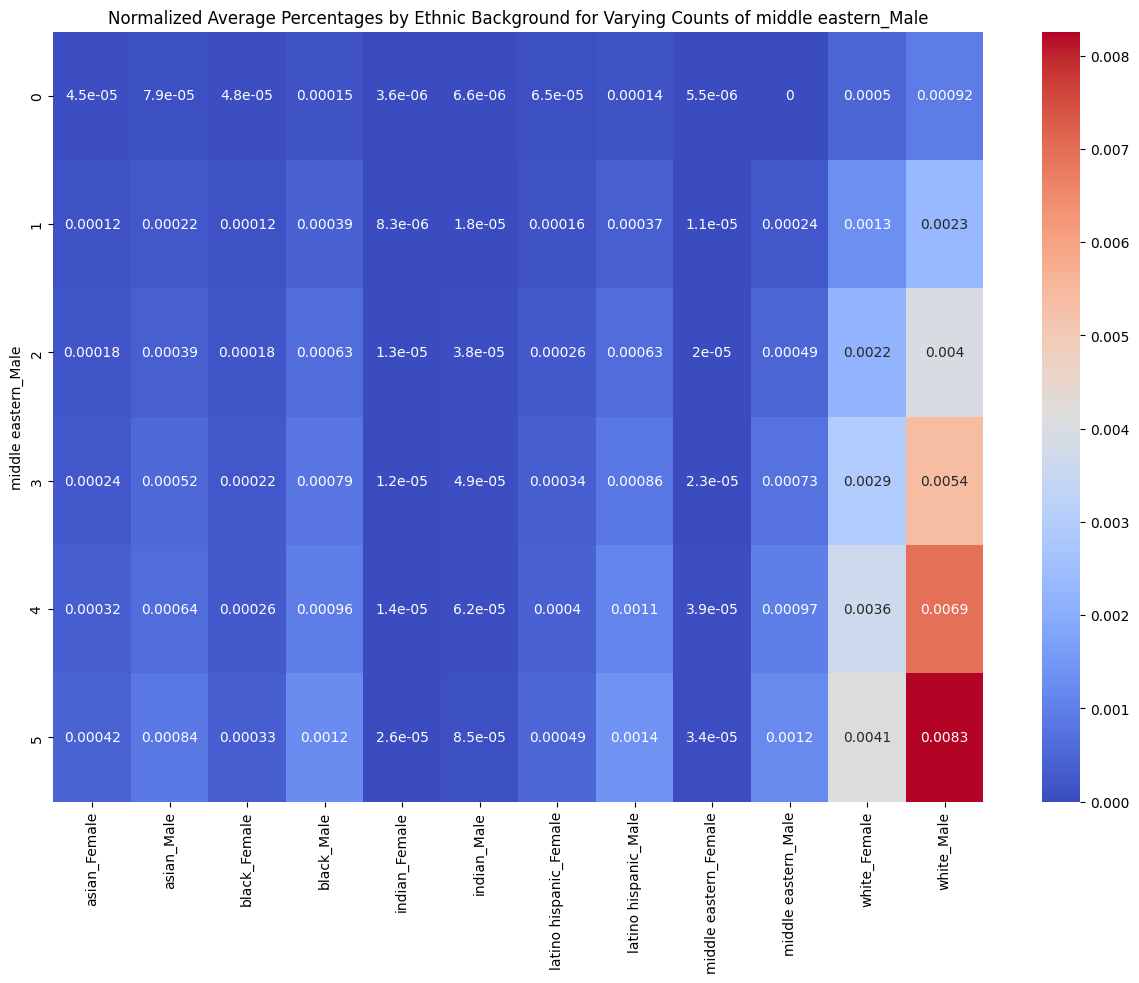

[  5   1   0   4   6  17  23  20  11   8  12  25  35  43  26  30  39  15
  13  10  18  19  14   7   3   2   9  16  21  31  27  32  41  28  29  22
  24  34  36  47  54  56  33  40  63  50  64  61  65  68  75  90  97  73
  72  80  78  60  62  88 105 111  71  46  37  93  42  38  51  49  44  53
  52  59  45  82  69  48  67  58  66  55 101  57 141 135 128  87 155  85
  91  79  92  76  70  99 102 166]


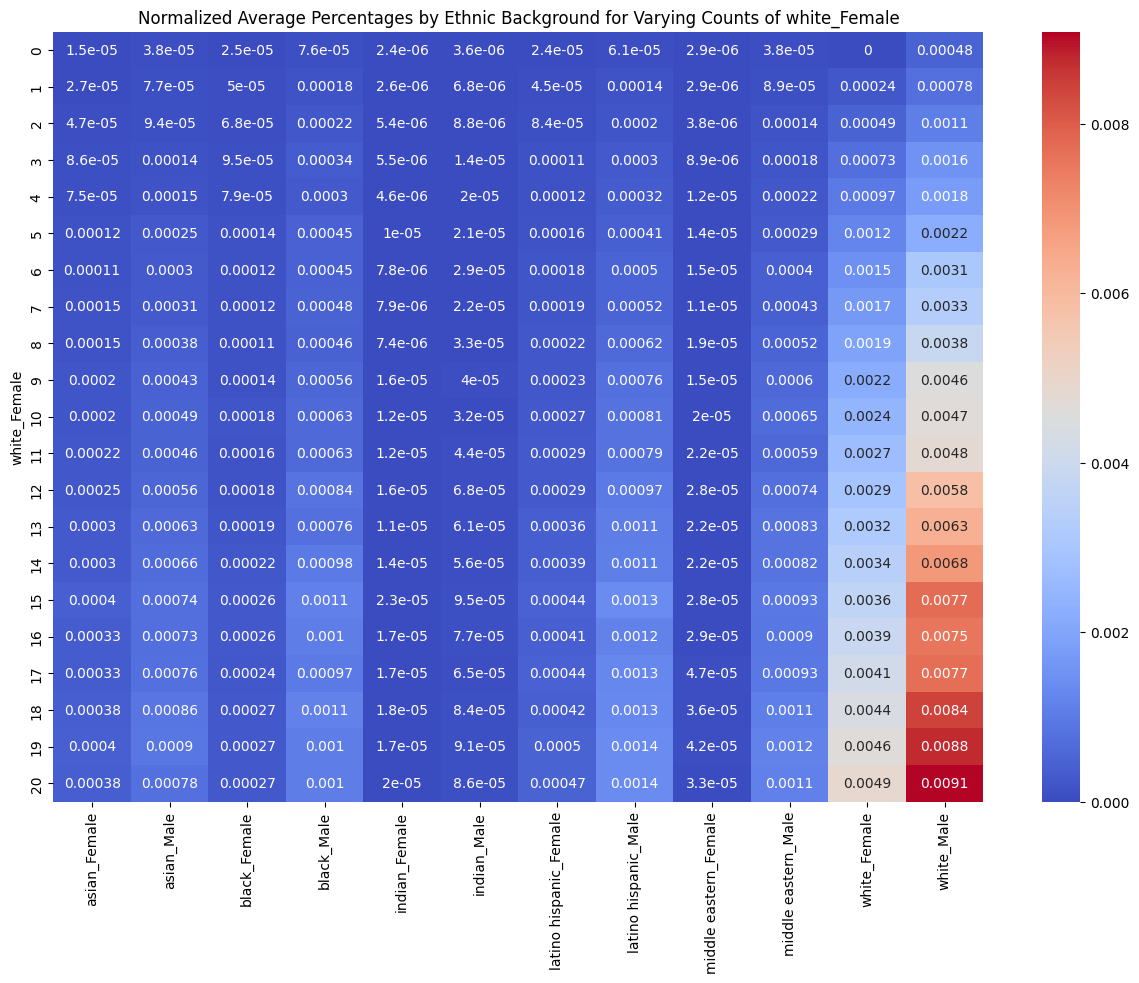

[ 19   1   3   2  22   9   6  40  38  39  44  12   5  13   7  60  73  71
  53  79  43  32  21  23  17  15  18  10   8  11   4  26  16  14   0  20
  27  28  31  50  55  34  30  72  52  49  37  29  24  25  42  48  36  35
  46  33  51  64  63  47  91  61 133  77  57  59  45  56  67  62  66  41
 123 164 126 122 150 148 152 153 181 183 179 165 145 157 154 139 132 167
  99 116  58  54  75 102  82  80  69  83  81 117  68  89  70  65  86 103
  76  98  93  90 105  85 108  88  94 104 120 134 136 119 112  84  97 110
 101  87  95  74  78 100 106 135 124 130 128 141 114 121 125 146 129 115
  92 142 144 166 168 127 156  96 189 109 111 147 175 118]


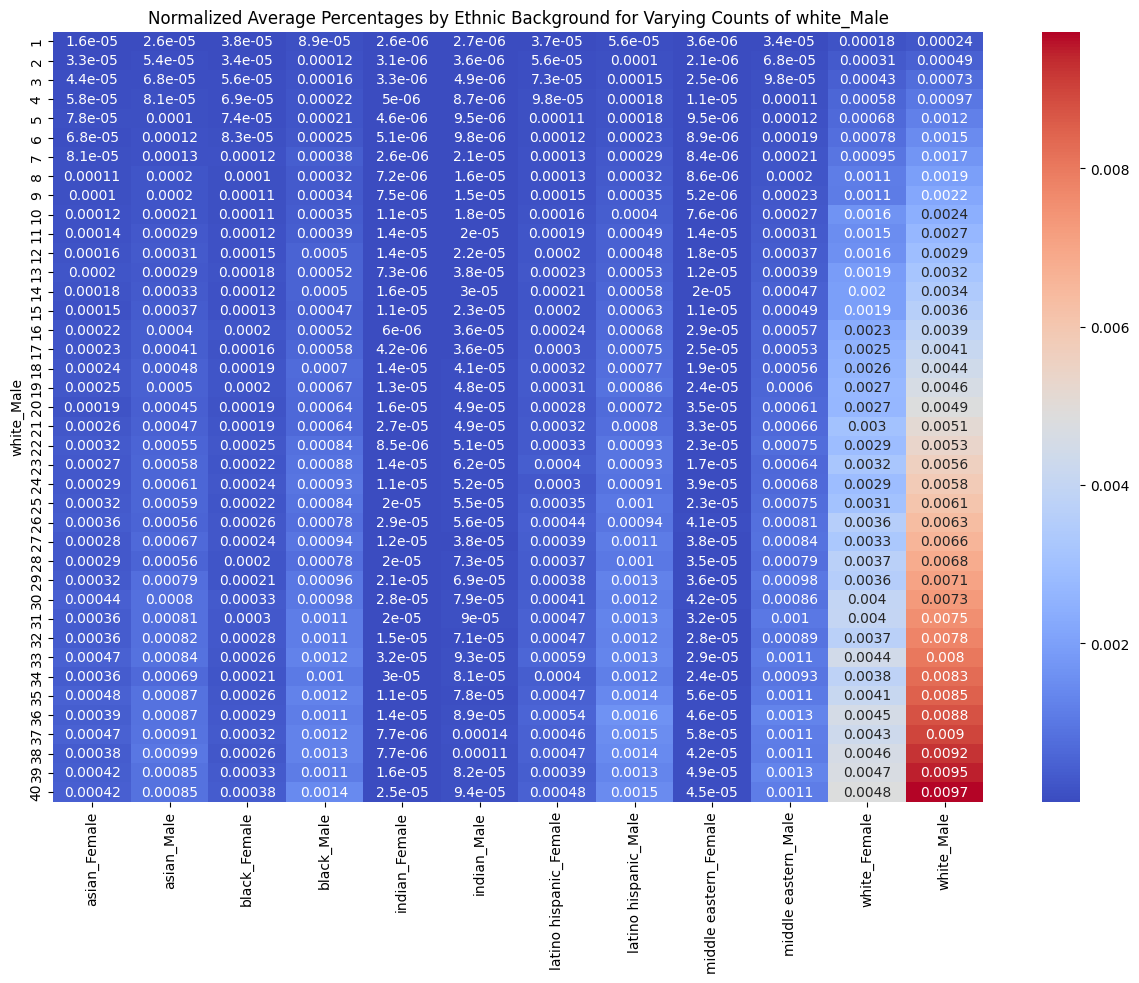

In [8]:
# Load the data
df = pd.read_csv(path)

# Remove 'Undetermined' columns if needed
df = df.filter(regex='^(?!.*_Undetermined).*$', axis=1)

# Drop columns that are not related to demographics (e.g., 'show_id', 'season_number')
demographics = df.drop(columns=['show_id', 'season_number'])

# Calculate the total sum of all demographics across the dataset
total_demographics_sum = demographics.sum().sum()

# Normalize the counts for each ethnic background by dividing by the total sum
normalized_demographics = demographics.div(total_demographics_sum) * 100

for demographic in normalized_demographics.columns:
    # print(df[demographic].unique())
    # # print(df[demographic].unique().quantile(0.25))
    # # Find the 25th and 75th percentiles
    # lower_bound = df[demographic].quantile(0.10)
    # upper_bound = df[demographic].quantile(0.90)

    # Filter the DataFrame based on the bounds
    filtered_df = df[(df[demographic] >= lower_bound) & (df[demographic] <= upper_bound)]

    # Recalculate the normalization for the filtered DataFrame
    filtered_normalized_demographics = filtered_df.drop(columns=['show_id', 'season_number']).div(total_demographics_sum) * 100

    # Compute the mean for all other demographics
    average_counts = filtered_normalized_demographics.groupby(filtered_df[demographic]).mean()

    # Visualize the data
    plt.figure(figsize=(15, 10))
    sns.heatmap(average_counts, cmap='coolwarm', annot=True)
    plt.title(f'Normalized Average Percentages by Ethnic Background for Varying Counts of {demographic}')
    plt.show()
